In [1]:
import pandas as pd
from IPython.display import Image

# 1. Introduction
This project aims to predict rental prices across Victoria, Australia, using Machine Learning models that integrates property features and geospatial data. By analyzing current and historical rental price trends, the goal is to provide predictions and highlight key factors influencing rental demand across metropolitan and regional areas.

The project leverages property data scraped from domain.com.au and external datasets such as proximity to public transport and essential services. The project provides a 3-year rental price forecast, which can be used by real estate agencies, property investors, and renters to make informed decisions.

# 2. Data Collection and Preprocessing
### Data Sources
**Property data:** Scraped from domain.com.au on 9/9/2024, including address, rental prices, property characteristics (bedrooms, bathrooms, parking), and descriptions. Note that the data can change over time.

**Historical data:** Acquired from Department of Families, Fairness and Housing, covers from March 2000 to June 2024 for 231 suburbs

**Essential services:** PTV dataset: closest public transport stations. OPM dataset: essential services (healthcare, groceries). Leveraging openrouteservice API to get the coordinates of each properties in the dataset.

**Income data:** from 2016 to 2021, collected from abs.gov.au, spatially separated by SA2 (Statistical Area Level 2) system.

**Population data:** from 2001-2023, collected from abs.gov.au, spatially separated by SA2 (Statistical Area Level 2) system.

### Data Cleaning
Missing values were removed, irregular price formats were standardized to weekly rate, and duplicates were dropped.

### Feature Engineering
New features, such as distance to the nearest tram station, train station, hospital, grocery store, and number of nearby schools, were added to improve prediction accuracy.

The number of bedrooms and bathrooms was extracted from property descriptions to serve as key predictors.

**The final property dataset used to predict is shown below:**

In [2]:
all_properties = pd.read_csv("../data/curated/houses_all_properties.csv")
all_properties.head()

,address,parking,type,num_schools,cost,suburb,beds,baths,cost/(beds+baths),geometry,...,NUMBER_OF_JOBS_PERSONS_2018-19,NUMBER_OF_JOBS_PERSONS_2019-20,NUMBER_OF_JOBS_PERSONS_2020-21,MEDIAN_INCOME_PERSONS_2016-17,MEDIAN_INCOME_PERSONS_2017-18,MEDIAN_INCOME_PERSONS_2018-19,MEDIAN_INCOME_PERSONS_2019-20,MEDIAN_INCOME_PERSONS_2020-21,centroid,distance_to_centroid
0,"(Leased) 3 Yarra Street, South Yarra VIC 3141",1,Apartment / Unit / Flat,13,460.0,South Yarra,1,1,230.00,POINT (144.992828 -37.838173),...,13060.0,12759.0,12394.0,26306.5,27750.5,29043.5,32390.5,34577.5,POINT (144.9965000772275 -37.83614617221807),0.004194
1,"004B/12 Albert Street, Hawthorn East VIC 3123",0,Apartment / Unit / Flat,14,400.0,Hawthorn East,1,1,200.00,POINT (145.048408 -37.823472),...,15422.0,14730.0,14159.0,26100.5,27117.0,26803.5,31088.0,34211.0,POINT (145.04991149745675 -37.83126983822268),0.007941
2,"04/949 Dandenong Road, Malvern East VIC 3145",0,Apartment / Unit / Flat,10,365.0,Malvern East,1,1,182.50,POINT (145.048262 -37.878631),...,18950.0,18895.0,19034.0,25636.0,26307.0,25956.5,28608.0,30642.5,POINT (145.065853863916 -37.87682309041124),0.017685
3,"0711/333 Exhibition St, Melbourne VIC 3000",0,Apartment / Unit / Flat,12,675.0,Melbourne,2,2,168.75,POINT (144.96834 -37.807831),...,13693.0,12473.0,11002.0,10656.0,10929.0,11120.5,12060.0,14478.0,POINT (144.96859287539095 -37.812787018836396),0.004962
4,"1 & 2/23 Koonawarra Street, Clayton VIC 3168",1,House,5,340.0,Clayton,1,1,170.00,POINT (145.124589 -37.90863),...,6188.0,6445.0,7536.0,11981.0,12020.0,11625.0,12689.5,12635.0,POINT (145.1381453634467 -37.91053619756948),0.013690


# 3. Modelling and Predictions

## 3.1 Rental Price Prediction 
### Model Selection
We experimented with machine learning models which are Linear Regression, Random Forest Regressor. Based on performance metrics, Random Forest Regressor was chosen for its better accuracy in handling the non-linear relationships present in the dataset.
### Training and Testing
Stratified sampling with threshold of 50 properties for each suburb.

Split ratio 80-20.
### Evaluation Metrics
Mean absolute error (MAE).

Root mean square error (RMSE).

$R^{2}$: Variance explainability of the independent variables.
### Feature Importance
Feature importance analysis revealed that proximity to tram stations, number of bedrooms, and bathrooms were the most critical features in predicting rental prices.

## 3.2 Future Median Rental Price Prediction
### Model selection
After visualising price trend from 2000 to 2023, we decided on Linear Regression.
### Dataset
Filter for data from March 2021 to June 2024, combined with predicted data as data for September 2024.
### Prediction
Predict future median price for 2025, 2026 and 2027.


# 4. Assumptions
The project assumes that current infrastructure and population growth trends will continue in the forecast period, and there are no significant shifts due to policy changes, economic downturns, or other unforeseen events. 

# 5. Results
### Current Rental Price
We evaluated two models—Random Forest and Linear Regression—using key metrics such as R² score, Mean Absolute Error (MAE), and Root Mean Square Error (RMSE). Below are the detailed results:

| Metric                     |        | *Random Forest* | *Linear Regression* |
|----------------------------|----------------|-------------------|-----------------------|
| *R² Score*               | Train          | **0.7435**            | 0.5455                |
|                            | Test           | **0.6939**            | 0.5367                |
| *Mean Absolute Error (MAE)* | Train       | **82.6006**           | 112.6424              |
|                            | Test           | **88.6736**           | 118.9562              |
| *Root Mean Square Error (RMSE)* | Train   | **130.1262**          | 173.2119              |
|                            | Test           | **150.4727**          | 185.1182


Overall, Random Forest perform better than Linear Regression.

### Future Median Rental Price
We evaluated Linear Regression model used to predict future median rental price, based on predicted median rental price and actual median rental price for 2024.

$R^{2}$ Score: 0.8864

Mean Absolute Error (MAE): 24.2495

Root Mean Square Error (RMSE): 28.3557


# 6. Limitations
The model does not account for external economic conditions, such as changes in interest rates or unemployment, which could significantly impact rental prices.

There may still be regional variability in the predictions, as factors such as future infrastructure developments and migration patterns can be unpredictable.

# 7. Issues & Challenges
## Dataset integrities
The properties data from domain.com.au is not verified since they were manually added by the providers.

No data for properites currently being rented.

The requests limit of openrouteservice is 5000 daily, which mean that the project cannot be run ideally.
Income and Jobs data are not recently updated.
## Model evaluation
Threshold of 50 properties per suburb make the dataset quite small and can be insufficient, explained by the high RMSE and MAE.

 Additionally, MAEs are much smaller than RMSEs for Random Forest model, suggesting outliers in the data.


# 8. Questions and Analysis
##### Q1. What are the most important internal and external features in predicting rental prices?
Feature importance plot from Random Forest Regression provide insights about the features influencing the rental prices in Victoria, Australia.

**Internal Features:**

**Bedrooms** stand out as the most influential factor in determining rental prices. More bedrooms typically mean the property can accommodate larger families or multiple tenants, making it more versatile and desirable in the rental market. This increased demand for properties with more bedrooms often leads to higher rental prices.

**External Features:**

**Proximity to tram stations** is the most important external factor affecting the rental prices. Proximity to tram stations is a vital factor because it directly affects a property’s accessibility and convenience. Being close to tram stations means easier and faster access to public transportation, which is especially important in urban areas where commuting is a daily necessity.

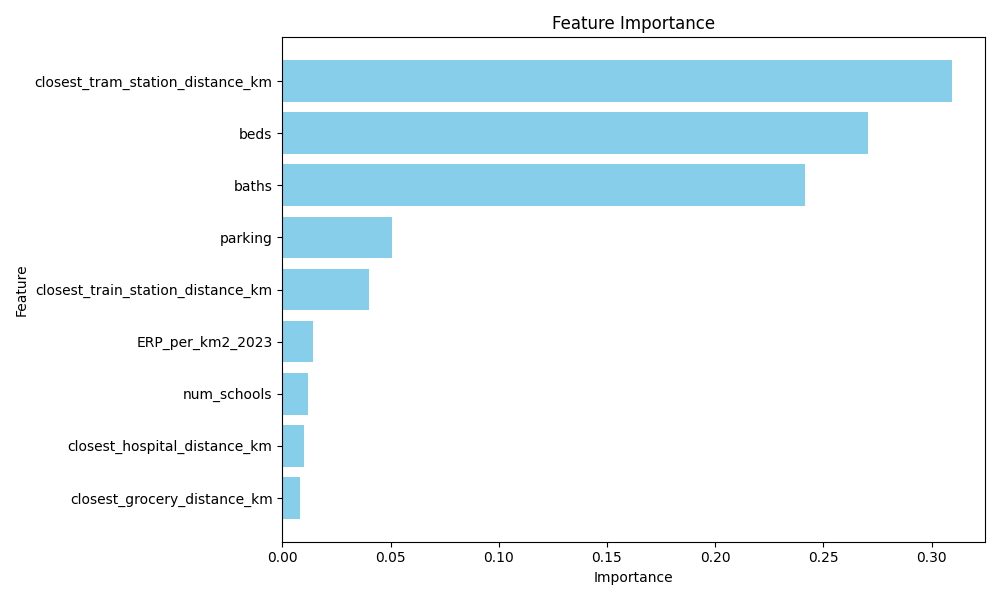

In [11]:
Image("../plots/summary/feature_importance_plot.png")

##### Q2. What are the top 10 suburbs with the highest predicted growth rate?
The top 10 suburbs with the highest predicted growth rate are:

1. Melbourne CBD - East (14.19%)

2. Melbourne CBD - West (14.19%)

3. Melbourne CBD - North (14.16%)

4. St Kilda - West (12.62%)

5. St Kilda - Central (12.59%)

6. Docklands (12.52%)

7. Carlton (12.2%)

8. North Melbourne (12.19%)

9. West Melbourne - Residential (12.17%)

10. South Yarra - South (10.67%)

These suburbs are expected to experience the most significant rental price growth over the next period.


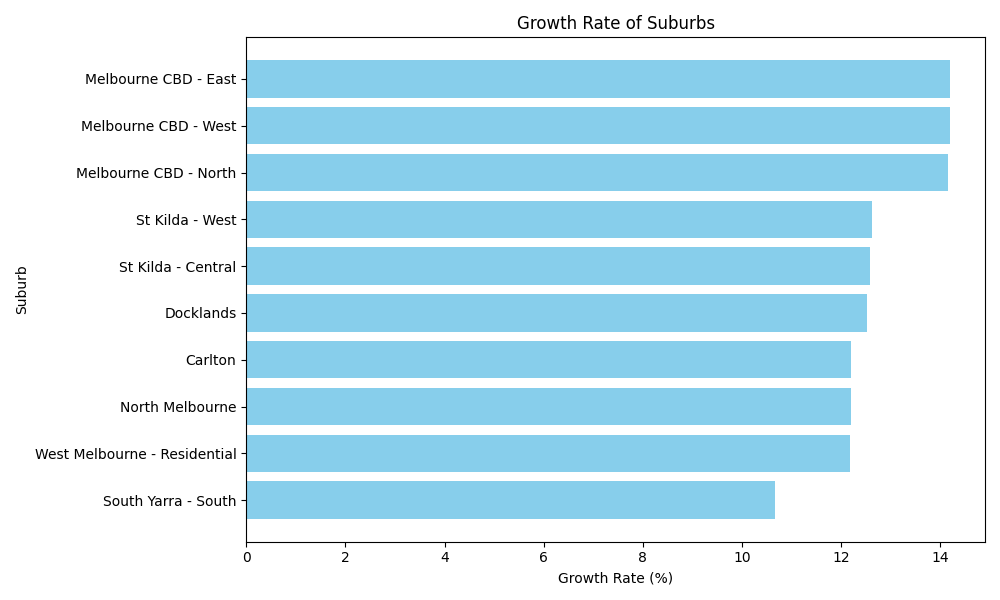

In [12]:
Image("../plots/summary/suburb_growth_rate.png")

##### Q3. What are the most liveable and affordable suburbs according to your chosen metrics?
The top 10 most livable and affordable suburbs, based on the calculated scores, are:

1. Truganina - North (1.8651)

2. Tarneit - North (1.8228)

3. Whittlesea (1.8155)

4. Mickleham - Yuroke (1.8101)

5. Rockbank - Mount Cottrell (1.8017)

6. Werribee - East (1.7394)

7. Wallan (1.7336)

8. Manor Lakes - Quandong (1.7242)

9. Clyde North - South (1.6579)

10. Doncaster (1.5106)

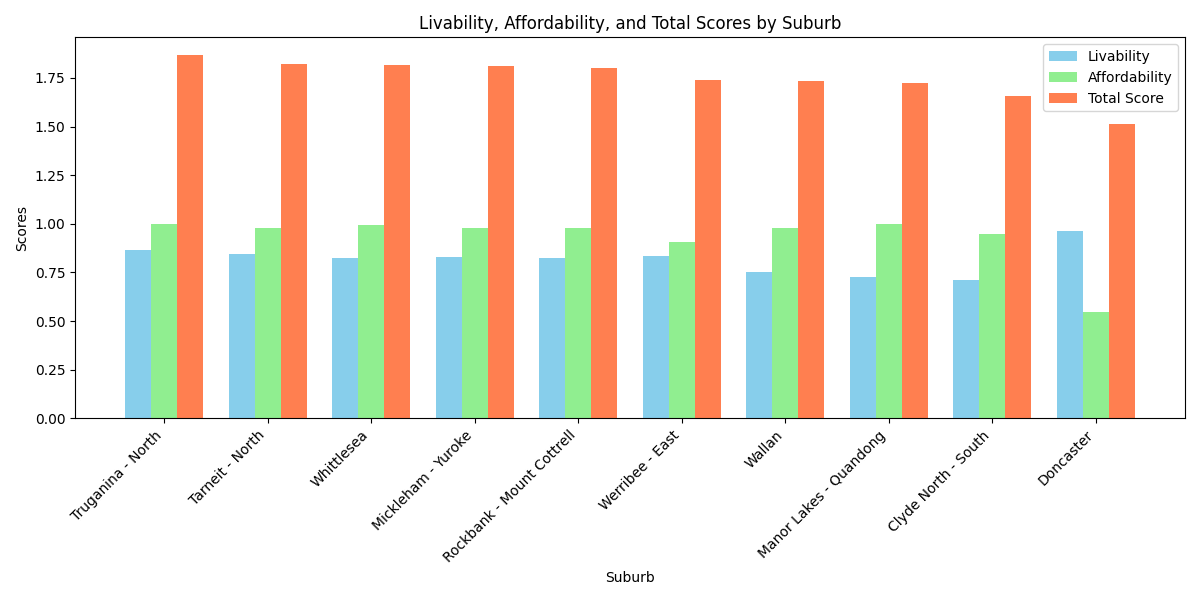

In [13]:
Image("../plots/summary/suburb_scores_comparison.png")

**Explanation of Metrics:**
1. **Livability Score**: 
   - This metric is calculated as the average of various livability factors such as access to public transport, proximity to schools, parks, healthcare facilities, and other amenities. The formula used is:
    $$
     \text{Livability Score} = \frac{1}{n} \sum_{i=1}^n (C_1 \cdot P_{1,i} + C_2 \cdot P_{2,i} + C_3 \cdot P_{3,i} + C_4 \cdot P_{4,i})
    $$
     - Where $C_i$ represent the weights assigned to different criteria (e.g., proximity to transport, access to parks).
     - $P_i$ are the metrics of those amenities in the suburb.

2. **Affordability Score**: 
   - This metric measures the relative affordability of a suburb by considering the predicted rental cost in relation to property features like the number of bedrooms and bathrooms. The formula is:
     $$
     \text{Affordability Score} = -\left(\frac{1}{n} \sum_{i=1}^n \left(\frac{\text{Predicted Cost}_i}{\text{Beds}_i + \text{Baths}_i}\right)\right)
     $$

3. **Total Score**: 
   - The total score combines both **livability** and **affordability** metrics to provide a balanced view of a suburb's desirability. It is calculated as:
     $$
     \text{Total Score} = \text{Livability Score} + \text{Affordability Score}
     $$
     - This score helps identify suburbs that not only offer a good quality of life but also remain budget-friendly, making them ideal choices for both tenants and investors.


**Analysis of Results:**

The analysis shows that **Truganina - North**, **Tarneit - North**, and **Whittlesea** rank among the top due to their high livability and affordability scores. These suburbs provide a good balance of access to amenities, transport, and affordable rental prices, making them highly attractive to renters.

The use of combined metrics ensures a holistic view, allowing stakeholders to identify suburbs that are not only pleasant to live in but also offer competitive rental pricing. This is particularly valuable for investors looking to target areas with strong rental demand and sustainable growth potential.